# **`Missing Value Imputations in Time Series`**



Imagine your weather station records the temperature every day. But one day, a bird poops on the sensor, and the next day, a software bug occurs. You get a dataset that looks like this:


|Date	|Temperature (°C)|
-------|---------------|
|2023-10-01|	22.0|
|2023-10-02|	23.5
|2023-10-03|	NaN	<- The bird poop incident
|2023-10-04	|NaN	<- The software bug
|2023-10-05	|27.0
|2023-10-06	|26.2





### Drop NA (drop.na())

|Date|	Temperature (°C)|
------|-----------------|
|2023-10-01|	22.0
|2023-10-02|	23.5
|2023-10-05|	27.0
|2023-10-06|	26.2

### Forward Fill (ffill())

|Date|	Temperature (°C)|	Explanation|
----|------|-----|
|2023-10-01	|22.0|
|2023-10-02|	23.5|	(The last known value)|
|2023-10-03	|23.5	|<- Copied forward from Oct 2nd|
|2023-10-04	|23.5	|<- Copied forward from Oct 2nd|
|2023-10-05	|27.0|
|2023-10-06	|26.2	|


### Backward fill (bfill())

|Date|	Temperature (°C)|	Explanation|
---|----|---|
|2023-10-01|22.0
|2023-10-02	|23.5
|2023-10-03|	27.0|	<- Copied backward from Oct 5th|
|2023-10-04|	27.0	|<- Copied backward from Oct 5th|
|2023-10-05|	27.0|	(The next known value)|
|2023-10-06	|26.2|


### Linear Interpolation

1. Value before gap (Oct 2): 23.5
2. Value after gap (Oct 5): 27.0
3. The gap is 2 days long. The total temperature change needed is 27.0 - 23.5 = 3.5 degrees.
4.So, the change per day is 3.5 / 3 = ~1.17 degrees. (Why 3? From Oct 2->3 is one step, 3->4 is a second, 4->5 is a third).


|Date|	Temperature (°C)|	Calculation|
|----------|------------|------------|
|2023-10-01	|22.0
|2023-10-02	|23.5|	(Start point)
|2023-10-03	|24.67|	23.5 + 1.17 = 24.67
|2023-10-04	|25.83|	24.67 + 1.17 = 25.83
|2023-10-05	|27.0	|(End point)
|2023-10-06|	26.2|

|Date|	True Temp|	Using ffill|	Using bfill|	Using interpolation|
-----|-----------|-------------|-------------|----------------|
2023-10-01|22.0|	22.0|	22.0|	22.0|
2023-10-02|	23.5|	23.5|	23.5|	23.5|
2023-10-03|	?|	23.5|	27.0|	~24.67|
2023-10-04|	?	|23.5	|27.0	|~25.83|
2023-10-05|	27.0|	27.0|	27.0|	27.0|
2023-10-06|	26.2|	26.2|	26.2|	26.2|

What does this tell us?

**ffill** creates a flatline. It suggests that the temperature stayed at 23.5°C for two days and then suddenly jumped to 27.0°C on the 5th.

**bfill** creates a time warp. It suggests the temperature on the 3rd and 4th was already 27.0°C, before it was actually measured on the 5th. This is often less logical.

**interpolation** creates a smooth transition, which, in the case of something like temperature, is usually the most realistic and reasonable assumption.

### Custom Imputation

Let's calculate the mean of our known values: (22.0 + 23.5 + 27.0 + 26.2) / 4 = 24.675.

|Date|	Temperature (°C)|
-----|--------|
2023-10-01|	22.0
2023-10-02|	23.5
2023-10-03|	24.675	<- Global Mean
2023-10-04|	24.675	<- Global Mean
2023-10-05|	27.0
2023-10-06|	26.2

### Custom Imputation (Seasonal Mean)

---



---



---



This method leverages the powerful patterns in your data, like seasonality (yearly patterns) or cyclicality (daily, weekly patterns).

1.	Identify the Pattern
2.	Find Historical Twins
3.	Calculate the Local Average

For our Example we are missing the values for Oct 03rd and Oct 04th Right? lets find out the historical (2 years Past Temperature for the same Day).


Year|	Temperature on October 3rd|
-------|--------|
2021	|21.0 °C
2022	|22.5 °C
2023	|??? (Missing)


The seasonal mean for October 3rd would be: (21.0 + 22.5) / 2 = 21.75 °C

We would impute our missing 2023 value with 21.75 °C.

### Weekly Seasonality

---



---



---
:


|Date & Time|	Sales ($)|	Status|
|----|-----|-----|
|...	|...	|...|
|Tue, Oct 10,| 9:00|	NaN	(Missing)
|Tue, Oct 10, |10:00	|NaN	(Missing)
|Tue, Oct 10, |11:00|	220	(Known)
|...|	...|	...|




---


Step 1: Gather the "Twin" Data

---



We look at the sales at the same time on previous Tuesdays.

Date & Time	|Sales ($)|	Why It's Relevant|
-----|----|-----
Tue, Sep 26, 9:00|	290|	Same day of the week (Tuesday), same time (9 AM)
Tue, Sep 19, 9:00	|315|	Same day of the week (Tuesday), same time (9 AM)
Tue, Oct 3, 9:00	|305|	Same day of the week (Tuesday), same time (9 AM)
Tue, Oct 10, 9:00	|NaN	|This is our missing value we need to fill.

--------------------------------------------------------------------------------

Date & Time|	Sales ($)|	Why It's Relevant
-------|--------|-------
Tue, Sep 26, 10:00|	265	|Same day of the week (Tuesday), same time (10 AM)
Tue, Sep 19, 10:00	|285|	Same day of the week (Tuesday), same time (10 AM)
Tue, Oct 3, 10:00	|275|	Same day of the week (Tuesday), same time (10 AM)
Tue, Oct 10, 10:00	|NaN|	This is our missing value we need to fill.



---


Step 2: Calculate the Seasonal Average:

---



`For 9:00 AM: (305 + 290 + 315) / 3 = $303.33`

`For 10:00 AM: (275 + 265 + 285) / 3 = $275.00`



---


Step 3: Impute the Missing Values

---



We now fill the gaps with these much more intelligent, context-aware values.

Date & Time|	Sales ($)|	Status
------|-----|-----
...	|...	|...
Tue, Oct 10, 9:00|	303.33|	Imputed
Tue, Oct 10, 10:00	|275.00|	Imputed
Tue, Oct 10, 11:00	|220|	Known
...	|...	|...


NOW TELL ME GUYS How and what will do if we dnt have historical Data then how will we impute the missing values?

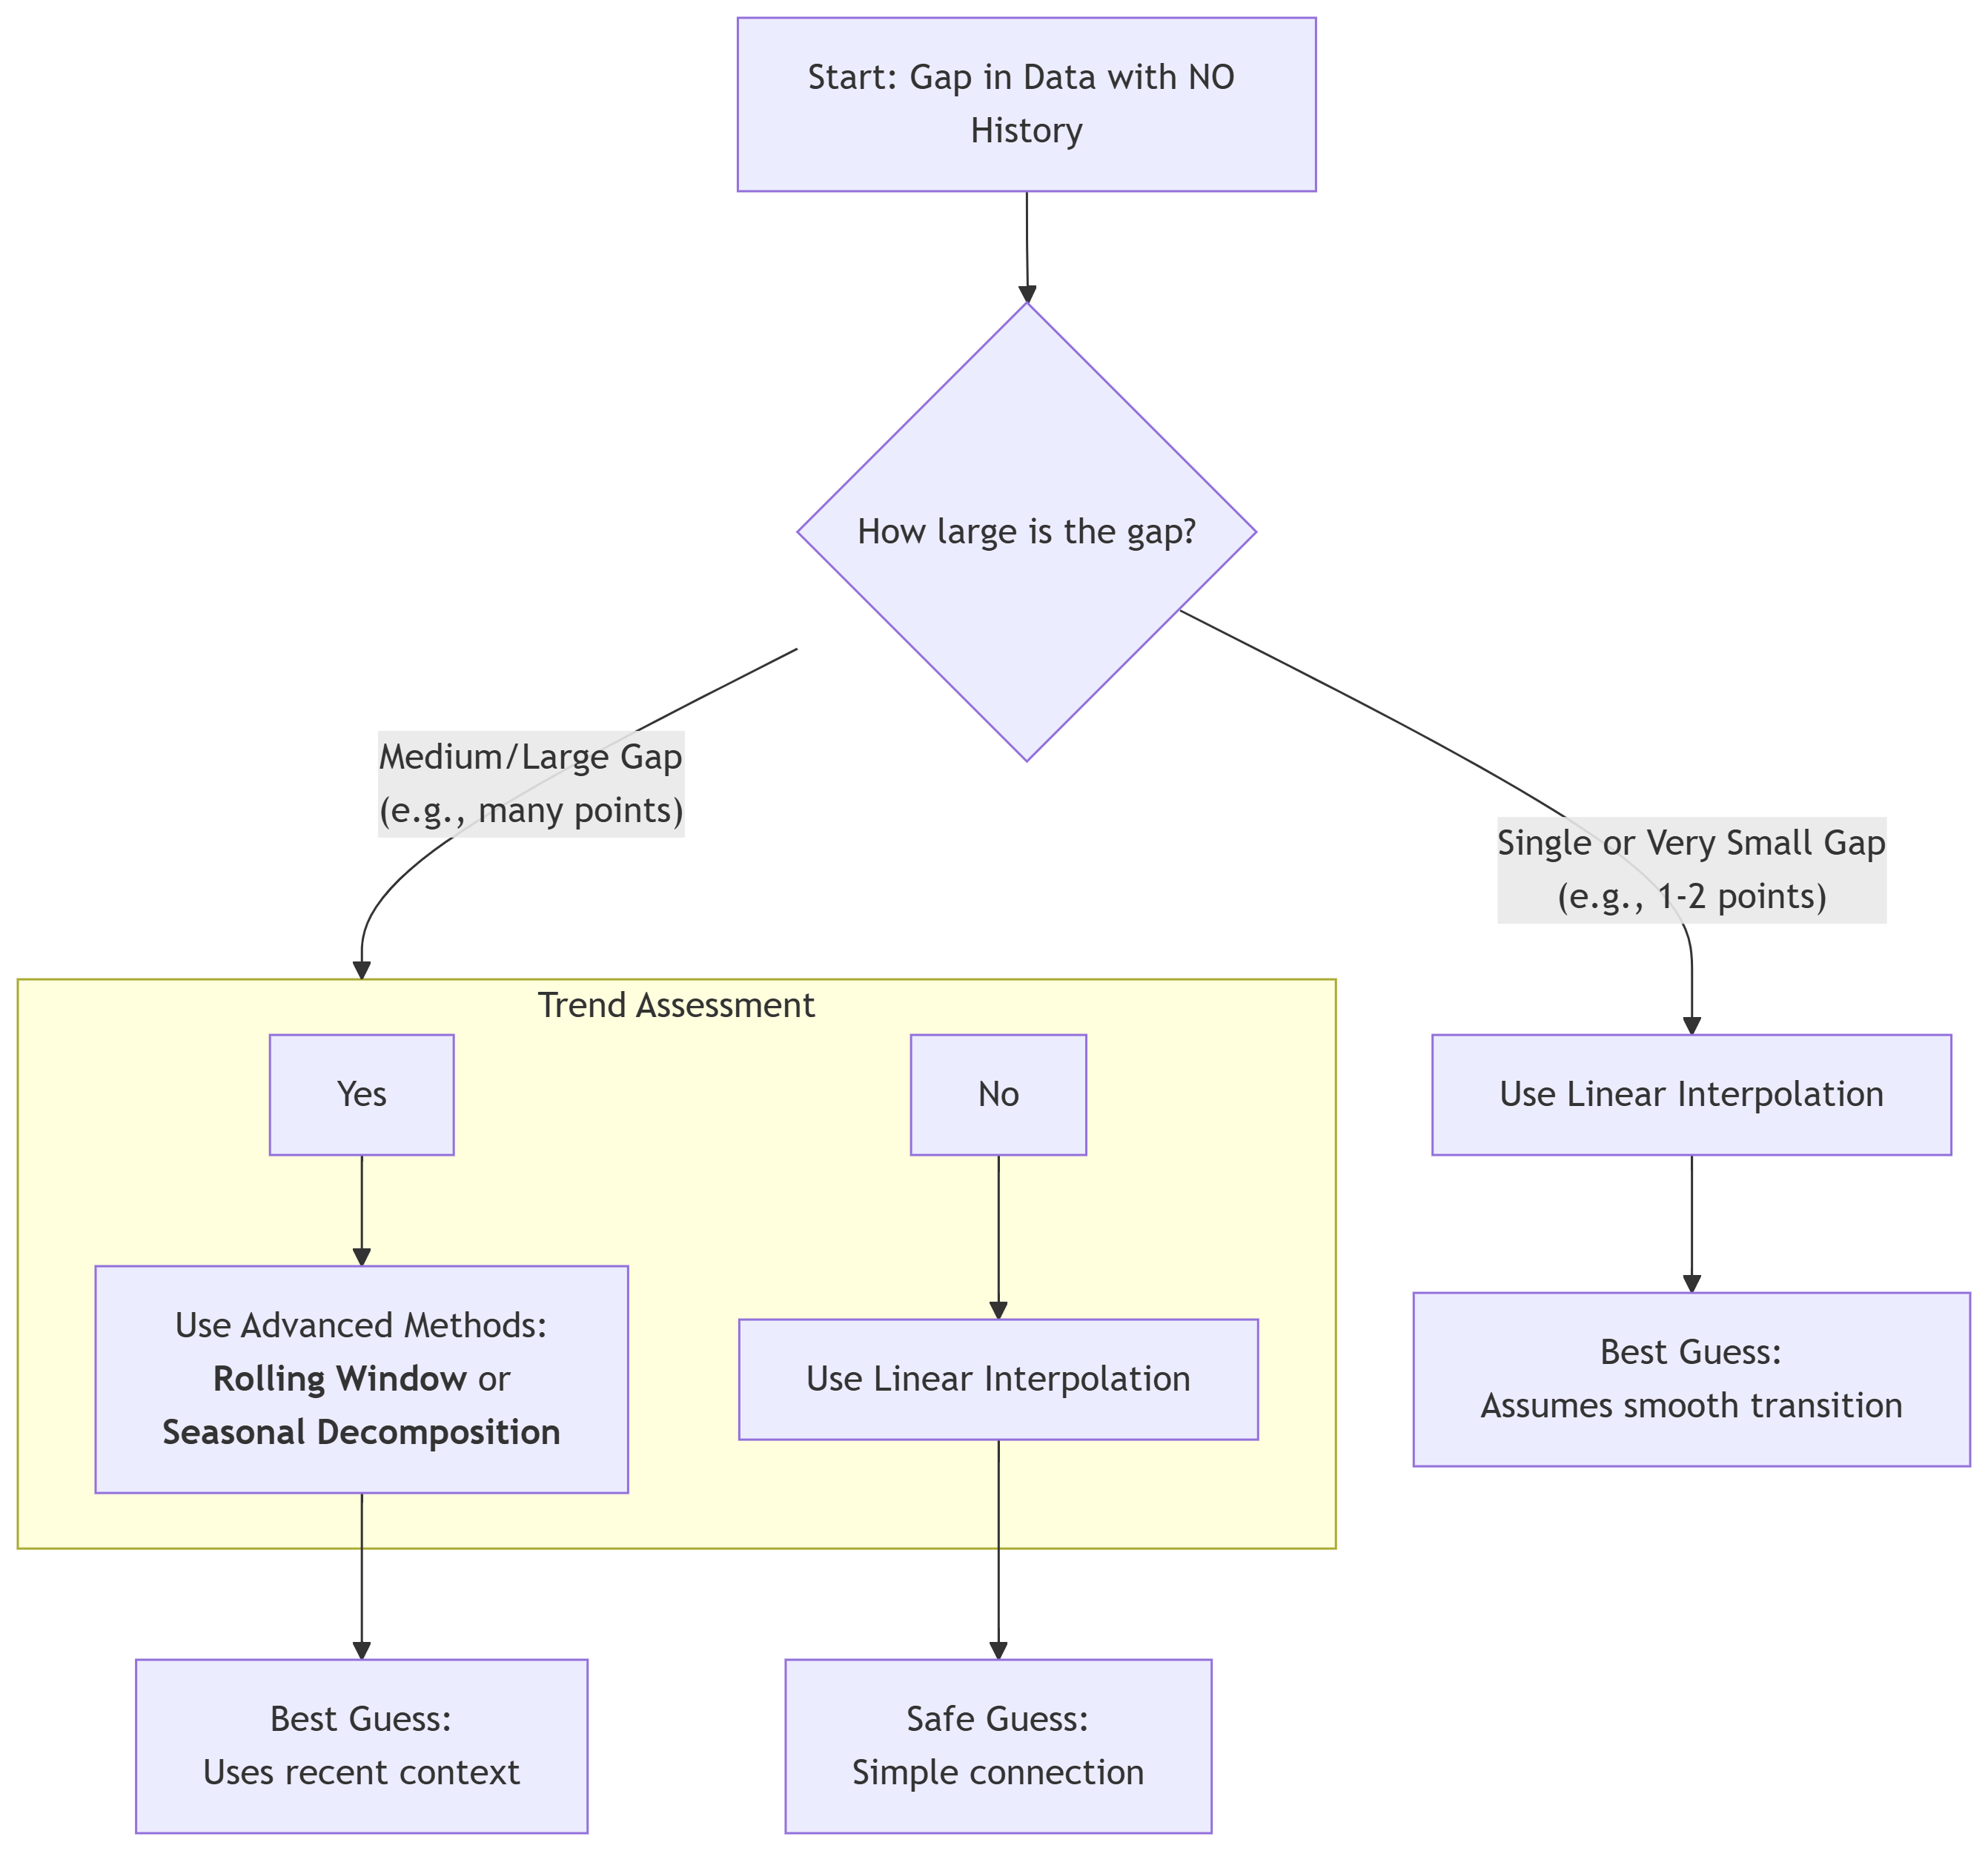

Method|	Layman's Term|	Pro|	Con|	Best For
------|-------|----|-----|----
dropna()	|Throw it out	|Simple	|Destroys time series structure; loses data	|Almost never. Only if gaps are at the very ends.
bfill / ffill|	Next/Previous value|	Simple; preserves order|	Creates unrealistic "steps" in data	|Sensor resetting, quick fixes
Linear Interpolation|	Connect the dots|	Realistic for small gaps; smooth transition	|Assumes a linear trend which may be false|	The default choice for small gaps.
Custom (Mean/Median)|	The average|	Better than nothing; simple|	Ignores trends and seasonality (if global)|	Small gaps, or large seasonal gaps (if smart)


Missing Values in 'Close' column:
10


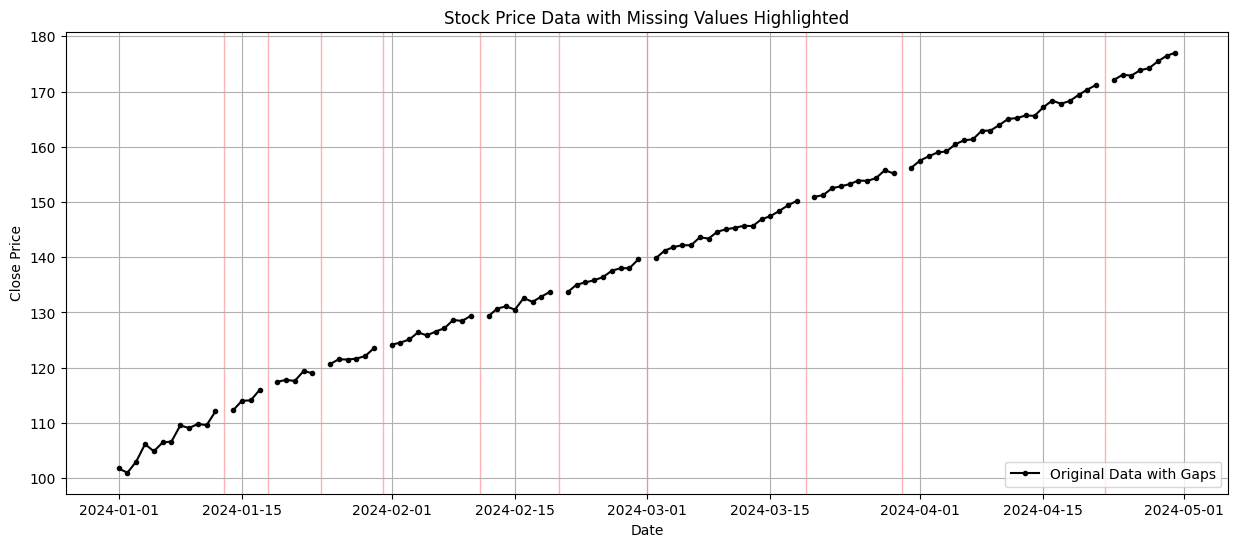

In [3]:
# Code Implementation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('Stock_price.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Let's see the missing values
print("Missing Values in 'Close' column:")
print(df['Close'].isnull().sum())

# Plot the original data with gaps
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Close'], label='Original Data with Gaps', color='Black', marker='o', markersize=3)
plt.title('Stock Price Data with Missing Values Highlighted')
plt.ylabel('Close Price')
plt.xlabel('Date')

# Highlight the missing points by finding their neighbors
missing_dates = df.index[df['Close'].isnull()]
for date in missing_dates:
    plt.axvspan(date, date, color='red', alpha=0.3) # Mark the exact date

plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Applying all imputation Methods:

# Method 1: Forward Fill (ffill)
df['Close_ffill'] = df['Close'].ffill()

# Method 2: Backward Fill (bfill)
df['Close_bfill'] = df['Close'].bfill()

# Method 3: Linear Interpolation (The sophisticated default)
df['Close_linear'] = df['Close'].interpolate(method='linear')

# Method 4: Global Mean (The "dumb" baseline)
global_mean = df['Close'].mean()
df['Close_global_mean'] = df['Close'].fillna(global_mean)

# Method 5: Rolling Mean (A "smarter" custom method, using a window of 3 trading days)
df['Close_rolling_mean'] = df['Close'].fillna( df['Close'].rolling(3, min_periods=1).mean() )
# Note: 'min_periods=1' allows it to work even at the start of the dataset

# BONUS: The Professional's Touch - Create an 'imputed_flag' column
df['imputed_flag'] = df['Close'].isnull().astype(int)

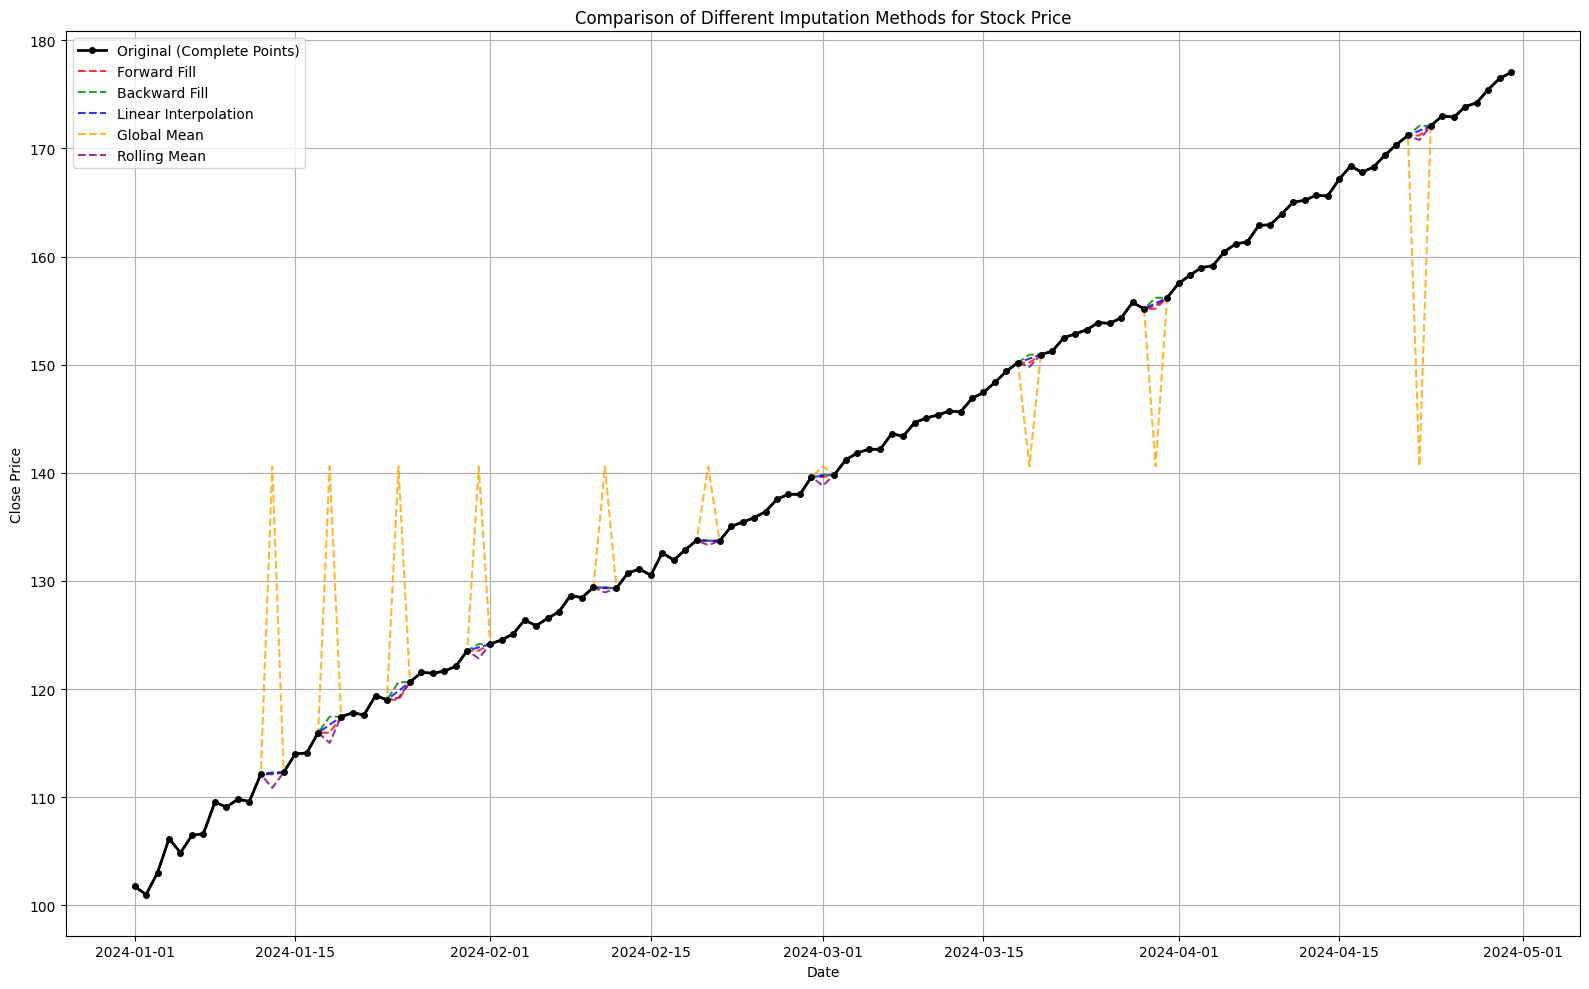

In [6]:
#Comparing the Results:

# Create a list of the columns we want to plot
methods = ['Close_ffill', 'Close_bfill', 'Close_linear', 'Close_global_mean', 'Close_rolling_mean']
labels = ['Forward Fill', 'Backward Fill', 'Linear Interpolation', 'Global Mean', 'Rolling Mean']

# Plot
plt.figure(figsize=(16, 10))

# First, plot the original complete data for reference
plt.plot(df.index, df['Close'], label='Original (Complete Points)', color='black', linewidth=2, marker='o', markersize=4, zorder=5)

# Now plot each imputation method
colors = ['red', 'green', 'blue', 'orange', 'purple']
for i, col in enumerate(methods):
    plt.plot(df.index, df[col], label=labels[i], color=colors[i], linestyle='--', alpha=0.8)

plt.title('Comparison of Different Imputation Methods for Stock Price')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

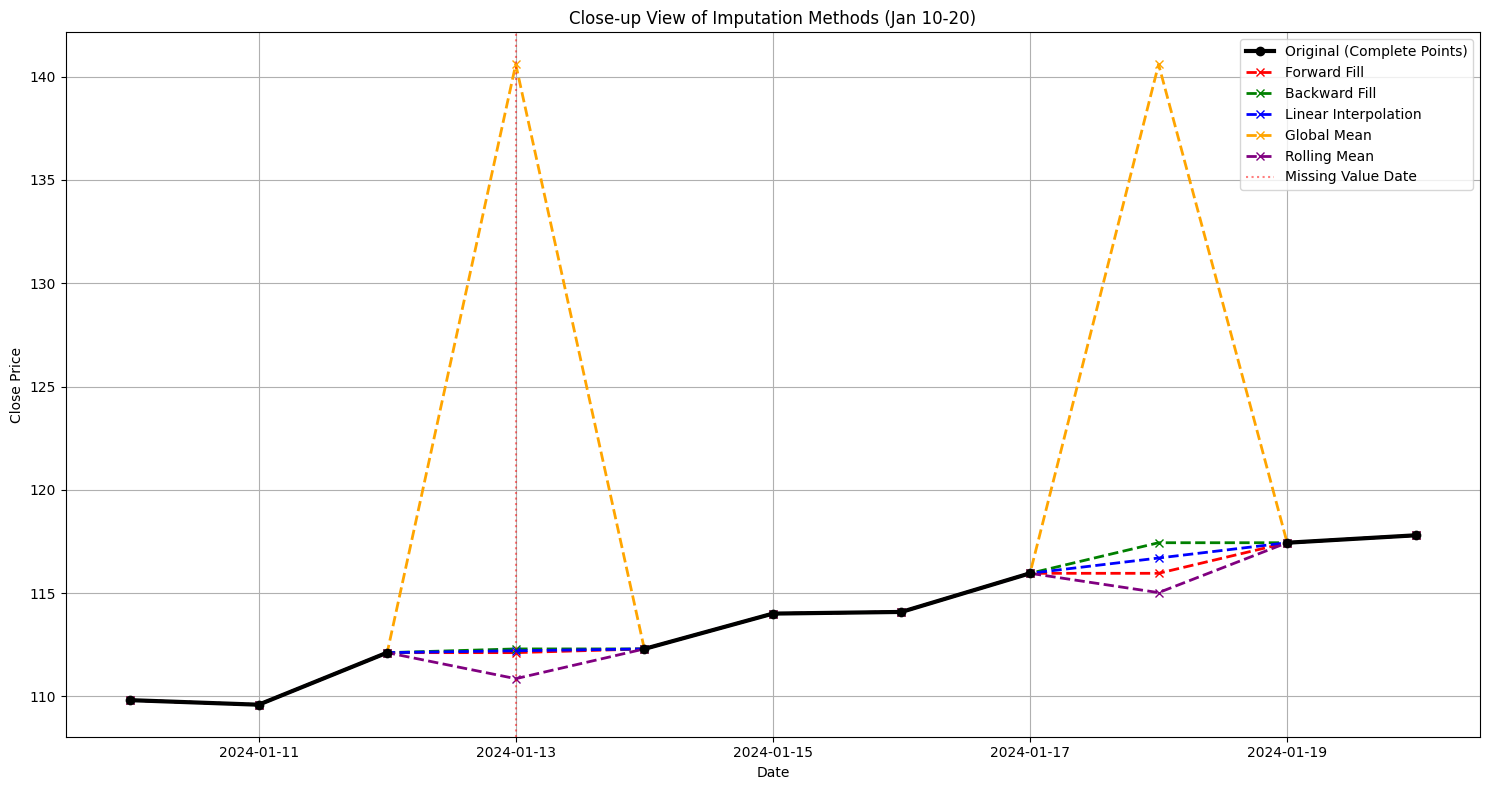

In [7]:
# Specify on a specify gap to see the details clearly

# Let's zoom in on a specific region with a missing value, say around Jan 13th
zoom_start = '2024-01-10'
zoom_end = '2024-01-20'

plt.figure(figsize=(15, 8))

# Plot the original data in the zoomed window
zoom_df = df.loc[zoom_start:zoom_end]
plt.plot(zoom_df.index, zoom_df['Close'], label='Original (Complete Points)', color='black', linewidth=3, marker='o', markersize=6, zorder=5)

# Plot the imputation methods
for i, col in enumerate(methods):
    plt.plot(zoom_df.index, zoom_df[col], label=labels[i], color=colors[i], linestyle='--', linewidth=2, marker='x')

plt.axvline(pd.to_datetime('2024-01-13'), color='red', linestyle=':', alpha=0.5, label='Missing Value Date')
plt.title('Close-up View of Imputation Methods (Jan 10-20)')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Without Flag, and using Backward Fill to impute the null values

`... 112.12 -> 112.30 -> 112.30 -> 114.01 ...`

It might incorrectly learn that "a repeated value is often followed by a large jump," which is a completely artificial pattern introduced by your imputation method.


### With the flag, the model sees:

`... 112.12 -> 112.30 (imputed) -> 112.30 (imputed) -> 114.01 ...`


It can now learn: "When the imputation flag is on, a repeated value is just an artifact of the data cleaning process, not a real market signal. I should ignore that 'pattern'."

### A Practical Example: Let's Get Technical

Let's see how this works with our stock price data. We'll add the flag and see what it looks like.

Our Dataset with the Flag:

Date|	Close|	imputed_flag|	Close_linear
-----|----|----|-----
2024-01-12	|112.12|	0|	112.12
2024-01-13	|NaN	|1	|112.21	<- Imputed!
2024-01-14	|112.30|	0|	112.30


Now, when we train a model, we don't just give it the Close_linear series. We give it a multivariate dataset:

Date|	Feature: Close_linear|	Feature: imputed_flag|	Target: Next Day's Price
---------|------------|----------|---------
2024-01-12|	112.12|	0|	112.21
2024-01-13	|112.21	|1|	112.30

The model learns to associate the imputed_flag=1 with the characteristics of the imputed values.

### Step 1: Create a Perfect, Simple Dataset
We'll create a dataset with a clear, known trend and then artificially create a gap. This way, we know the "truth" and can see how well each method recovers it.

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(42)

# Create a simple, perfect upward trend with a little noise
dates = pd.date_range(start='2024-01-01', periods=10, freq='D')
true_trend = np.linspace(100, 110, 10)  # A perfect line from 100 to 110
noise = np.random.normal(0, 0.5, 10)    # A tiny bit of randomness
perfect_data = true_trend + noise

# Create a DataFrame and ARTIFICIALLY create a gap
df = pd.DataFrame({'Date': dates, 'Close': perfect_data})
df.set_index('Date', inplace=True)

# Let's say the measurement failed on the 5th day. We know the true value was ~104.5
df.iloc[4, 0] = np.nan  # Introduce a NaN at position 4 (the 5th element)

print("Our Artificial Dataset with a Known Gap:")
print(df)

Our Artificial Dataset with a Known Gap:
                 Close
Date                  
2024-01-01  100.248357
2024-01-02  101.041979
2024-01-03  102.546066
2024-01-04  104.094848
2024-01-05         NaN
2024-01-06  105.438487
2024-01-07  107.456273
2024-01-08  108.161495
2024-01-09  108.654152
2024-01-10  110.271280


### Step 2: Impute the Value (With and Without Flag)
We'll use Linear Interpolation, our champion method.

In [17]:
# Impute using Linear Interpolation
df['Close_imputed'] = df['Close'].interpolate(method='linear')

# Create the Imputation Flag (1 for imputed, 0 for real)
df['imputed_flag'] = df['Close'].isna().astype(int)

print("\nDataset After Imputation:")
df.head(8)


Dataset After Imputation:


,Close,Close_imputed,imputed_flag
Date,,,
2024-01-01,100.248357,100.248357,0
2024-01-02,101.041979,101.041979,0
2024-01-03,102.546066,102.546066,0
2024-01-04,104.094848,104.094848,0
2024-01-05,NaN,104.766668,1
2024-01-06,105.438487,105.438487,0
2024-01-07,107.456273,107.456273,0
2024-01-08,108.161495,108.161495,0


### Step 3: Build forecasting Models to See the Difference

Now, let's use a simple model to predict the next day's price. We'll train two versions:

Model A (No Flag): Only uses the Close_imputed price to predict the future.

Model B (With Flag): Uses both the Close_imputed price AND the imputed_flag to predict the future.

In [18]:
# Create the target: 'next day's close price'
df['target'] = df['Close_imputed'].shift(-1)  # This puts tomorrow's price in today's row

# Drop the last row because it has no target
df_for_training = df.iloc[:-1].copy()

# Define Features for each model
features_no_flag = [['Close_imputed']]  # Model A: Only the price
features_with_flag = [['Close_imputed', 'imputed_flag']] # Model B: Price + Flag

target = 'target'

# Split features and target
X_no_flag = df_for_training[['Close_imputed']]
X_with_flag = df_for_training[['Close_imputed', 'imputed_flag']]
y = df_for_training[target]

# Train the two Linear Regression models
model_no_flag = LinearRegression()
model_with_flag = LinearRegression()

model_no_flag.fit(X_no_flag, y)
model_with_flag.fit(X_with_flag, y)

# Make predictions on the same training data (for simplicity)
df_for_training['pred_no_flag'] = model_no_flag.predict(X_no_flag)
df_for_training['pred_with_flag'] = model_with_flag.predict(X_with_flag)

# Let's see the predictions for the imputed day and its neighbors
print(df_for_training[['Close_imputed', 'imputed_flag', 'target', 'pred_no_flag', 'pred_with_flag']].round(2))

            Close_imputed  imputed_flag  target  pred_no_flag  pred_with_flag
Date                                                                         
2024-01-01         100.25             0  101.04        101.44          101.50
2024-01-02         101.04             0  102.55        102.22          102.27
2024-01-03         102.55             0  104.09        103.70          103.75
2024-01-04         104.09             0  104.77        105.22          105.27
2024-01-05         104.77             1  105.44        105.88          105.44
2024-01-06         105.44             0  107.46        106.54          106.59
2024-01-07         107.46             0  108.16        108.52          108.58
2024-01-08         108.16             0  108.65        109.21          109.27
2024-01-09         108.65             0  110.27        109.70          109.75


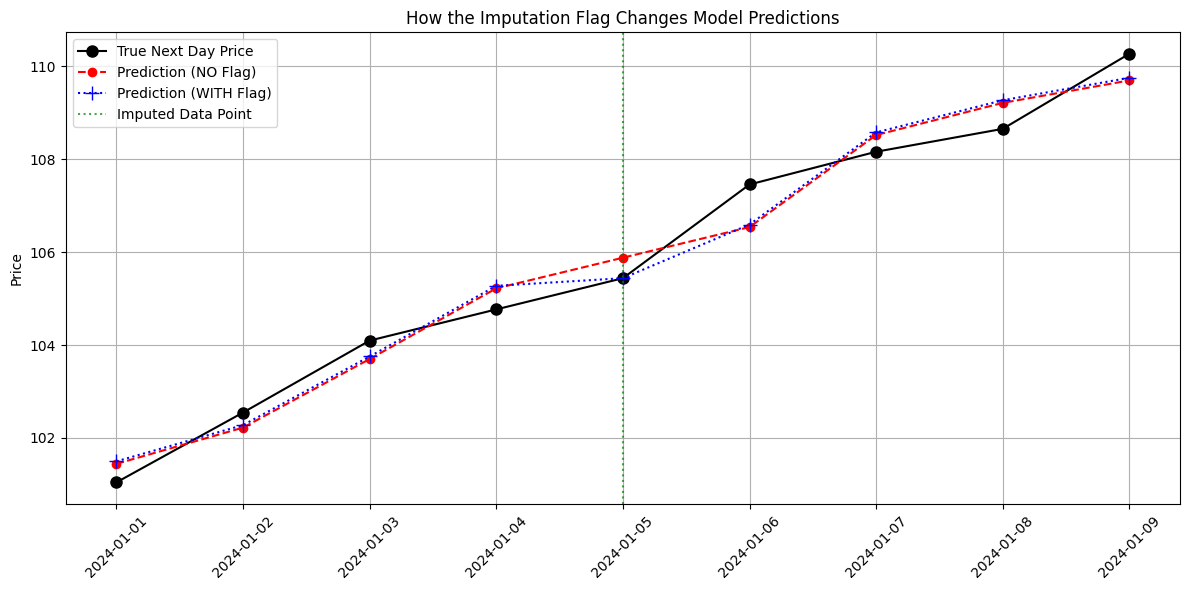

In [19]:
plt.figure(figsize=(12, 6))

# Plot the actual target values we're trying to predict
plt.plot(df_for_training.index, df_for_training['target'], 'ko-', label='True Next Day Price', markersize=8)

# Plot the predictions from both models
plt.plot(df_for_training.index, df_for_training['pred_no_flag'], 'r--o', label='Prediction (NO Flag)')
plt.plot(df_for_training.index, df_for_training['pred_with_flag'], 'b:+', label='Prediction (WITH Flag)', markersize=10)

# Highlight the imputed point
imputed_date = df_for_training[df_for_training['imputed_flag'] == 1].index[0]
plt.axvline(x=imputed_date, color='green', linestyle=':', alpha=0.7, label='Imputed Data Point')

plt.title('How the Imputation Flag Changes Model Predictions')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()